Amostras iniciais do dataset:
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimete

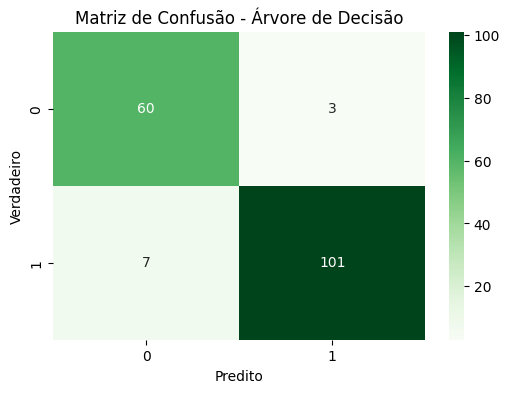

Random Forest - Relatório de Classificação:
               precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        63
      benign       0.96      0.99      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



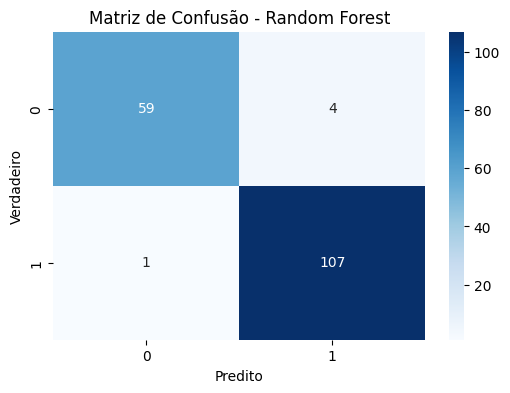

Comparação entre Árvore de Decisão e Random Forest:

Árvore de Decisão - Precisão Geral: 0.9415204678362573
Random Forest - Precisão Geral: 0.9707602339181286


In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1 Carregar e Explorar o Dataset
data = load_breast_cancer()
X = data.data
y = data.target
features = data.feature_names
target_names = data.target_names

# Visualizar amostras
df = pd.DataFrame(X, columns=features)
df['target'] = y
print("Amostras iniciais do dataset:\n", df.head())
print("\nClasses alvo:\n", target_names)

# 2 Pré-processamento dos Dados
# Dividir os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nVerificação de valores nulos no dataset:", df.isnull().sum().sum())

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 3 Treinar Modelos de Classificação
# Treinar o modelo de Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

# Treinar o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 4 Avaliação dos Modelos
# Avaliação do modelo de Árvore de Decisão
print("Árvore de Decisão - Relatório de Classificação:\n", classification_report(y_test, y_pred_dt, target_names=target_names))
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

# Avaliação do modelo Random Forest
print("Random Forest - Relatório de Classificação:\n", classification_report(y_test, y_pred_rf, target_names=target_names))
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Random Forest")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

# Comparação dos modelos
print("Comparação entre Árvore de Decisão e Random Forest:")
print("\nÁrvore de Decisão - Precisão Geral:", dt_model.score(X_test, y_test))
print("Random Forest - Precisão Geral:", rf_model.score(X_test, y_test))

<ipython-input-14-9332804b7d3e>:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_plot, x='Métrica', y='Valor', hue='Modelo', ci=None, palette="deep", capsize=.1)


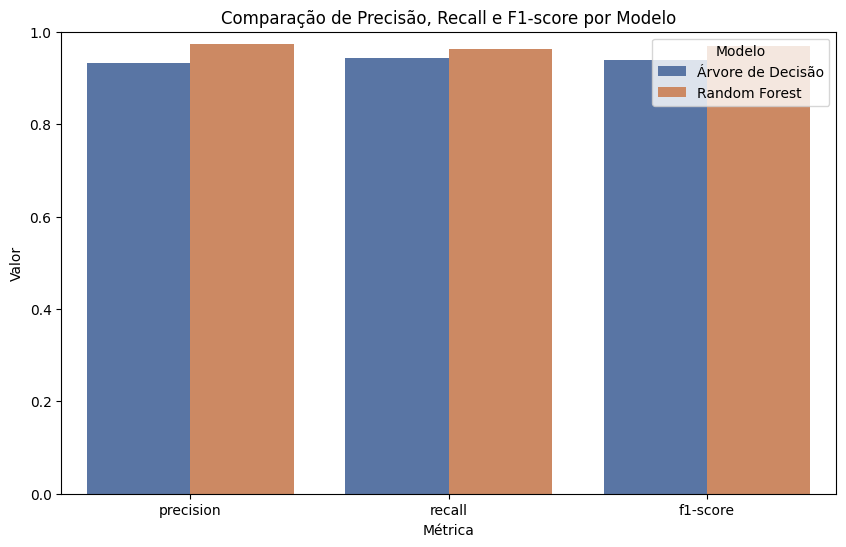

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Gerar os relatórios de classificação para ambos os modelos
report_dt = classification_report(y_test, y_pred_dt, target_names=target_names, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, target_names=target_names, output_dict=True)

# Extrair Precisão, Recall e F1-score para cada classe e modelo
metrics = ['precision', 'recall', 'f1-score']
classes = target_names

# Organizar os dados para facilitar a plotagem
data = {
    'Modelo': [],
    'Classe': [],
    'Métrica': [],
    'Valor': []
}

# Adicionar dados da Árvore de Decisão
for metric in metrics:
    for cls in classes:
        data['Modelo'].append('Árvore de Decisão')
        data['Classe'].append(cls)
        data['Métrica'].append(metric)
        data['Valor'].append(report_dt[cls][metric])

# Adicionar dados do Random Forest
for metric in metrics:
    for cls in classes:
        data['Modelo'].append('Random Forest')
        data['Classe'].append(cls)
        data['Métrica'].append(metric)
        data['Valor'].append(report_rf[cls][metric])

# Converter para DataFrame para plotagem
import pandas as pd
df_plot = pd.DataFrame(data)

# Plotagem usando Seaborn para uma visualização mais organizada
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(data=df_plot, x='Métrica', y='Valor', hue='Modelo', ci=None, palette="deep", capsize=.1)
plt.title("Comparação de Precisão, Recall e F1-score por Modelo")
plt.xlabel("Métrica")
plt.ylabel("Valor")
plt.legend(title='Modelo')
plt.ylim(0, 1)  # Como as métricas são de 0 a 1
plt.show()